In [51]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive

In [52]:
drive.mount('/content/drive') # Monta o conteúdo do drive para ele ser acessado pelo notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
#Lê a base, separa os dados importantes e os modifica para serem trabalhados no K-means
data = pd.read_csv('/content/drive/MyDrive/eyes_clustering.csv')
data.drop(data.columns[[0,6]],axis=1, inplace=True)
data = data.applymap(lambda x: str(x).replace(',','.') )
data

,AL,ACD,WTW,K1,K2
0,23.79,3.32,12,43.6,44.29
1,24.6,3.39,12.3,42.03,43.95
2,24.59,3.51,12.3,42.83,43.05
3,24.04,2.96,12,42.35,42.83
4,24.8,2.44,12.2,41.01,41.67
...,...,...,...,...,...
1523,23.32,3.29,12.5,43.16,43.95
1524,23.59,3.19,13,42.72,43.6
1525,26.18,3.83,12.1,43.44,44.18
1526,24.09,2.77,12.6,42.83,43.72


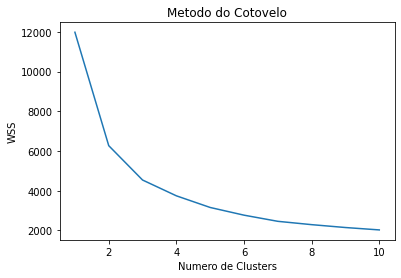

In [54]:
#Utilizando o método do cotovelo para encontrar um número ótimo de clusters
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Metodo do Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.show()

In [55]:
#Aplicando o K-means e verificando seus centróides
kmeans = KMeans(n_clusters=3, random_state=0)
pred_y = kmeans.fit_predict(data)
kmeans.cluster_centers_


array([[23.54785997,  3.13110964, 12.01149273, 43.33453104, 44.18457067],
       [22.59333333,  3.00531963, 11.71974886, 45.38657534, 46.37525114],
       [24.52192192,  3.18468468, 12.22822823, 41.25333333, 42.15576577]])

In [56]:
#Organizando os dados da base original separando-os por clusters
cluster_map = pd.DataFrame()
cluster_map['índice dos dados'] = data.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map

,índice dos dados,cluster
0,0,0
1,1,0
2,2,0
3,3,2
4,4,2
...,...,...
1523,1523,0
1524,1524,0
1525,1525,0
1526,1526,0


In [57]:
# Cria uma nova database contendo todo as informações dos clusters e a coluna "correto"

cluster_data = pd.read_csv('/content/drive/MyDrive/eyes_clustering.csv')
cluster_data = pd.concat([cluster_data, cluster_map], axis=1)
cluster_data.drop(['ID','AL','ACD','WTW','K1','K2','índice dos dados'],axis=1, inplace=True)

cluster_data

,Correto,cluster
0,S,0
1,S,0
2,S,0
3,S,2
4,S,2
...,...,...
1523,S,0
1524,N,0
1525,S,0
1526,S,0


In [58]:
cluster_data.value_counts()

Correto  cluster
S        0          543
         1          302
         2          237
N        0          214
         1          136
         2           96
dtype: int64